In [12]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
import FinanceDataReader as fdr
import pandas as pd
df = fdr.DataReader('005930', '2017', "2021")
df.head()

Open   High    Low  Close  Volume    Change
Date                                                    
2017-01-02  35980  36240  35880  36100   93012  0.001665
2017-01-03  36280  36620  36020  36480  147153  0.010526
2017-01-04  36500  36520  36100  36160  159435 -0.008772
2017-01-05  36060  36060  35540  35560  219349 -0.016593
2017-01-06  36180  36440  36040  36200  177619  0.017998

<AxesSubplot:xlabel='Date'>

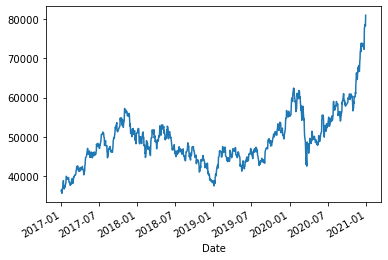

In [2]:
# 종가 시각화 하기
df["Close"].plot()

In [7]:
# 상장종목 목록 가져오기
# colab 사용자의 경우 이미 csv 파일이 지워졌을 수 있기 때문에 파일이 없을 경우 아래 셀에서 다시 load하면 됩니다.
df_krx = fdr.StockListing('KRX')
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(2737, 17)

In [10]:
#Code를 Symbol로 컬럼 명을 변경합니다
df_krx = df_krx.rename(columns={'Code':'Symbol'})

df_krx[["Symbol", "Name"]].head()

Symbol      Name
0  005930      삼성전자
1  373220  LG에너지솔루션
2  000660    SK하이닉스
3  207940  삼성바이오로직스
4  005490  POSCO홀딩스

In [15]:
# 종목명으로 종목코드 받아오는 함수 만들기
def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        return item_code_list[0]
    else :
        return False

In [16]:
item_code_by_item_name("하이브") 

'352820'

In [17]:
# 네이버로 등록된 상장사는 없습니다.
# 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인합니다.
item_code_by_item_name("네이버") 

False

In [19]:
# 삼성전자
item_code_by_item_name("삼성전자") 

'005930'

In [23]:
# 종목명으로 일별 시세 받아오는 함수
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code_by_item_name(item_name), str(year))
        return df_day
    else:
        return False

In [24]:
find_item_list("NAVER", 2017)

Open    High     Low   Close   Volume    Change
Date                                                         
2017-01-02  155820  157621  155219  155620    30777  0.002577
2017-01-03  155618  155618  153616  153617    51766 -0.012871
2017-01-04  155220  162230  154419  162230   120359  0.056068
2017-01-05  162228  162228  158423  158424    68724 -0.023461
2017-01-06  158423  160426  157422  160026    50269  0.010112
...            ...     ...     ...     ...      ...       ...
2023-07-21  202500  206500  200500  206000   629745  0.007335
2023-07-24  205500  206500  201500  203000   662414 -0.014563
2023-07-25  202000  203500  199300  201000   661241 -0.009852
2023-07-26  201500  202500  194900  197700  1068784 -0.016418
2023-07-27  197500  212000  197000  211500  1421502  0.069803

[1617 rows x 6 columns]

In [46]:
#종목 명으로 일별 시세 잘 가져오는지 확인
# LG화학의 데이터를 가져옵니다.
find_item_list("LG화학")

Open    High     Low   Close  Volume    Change
Date                                                        
2020-01-02  321000  321000  313500  314000  139496 -0.011024
2020-01-03  317000  318500  310500  311000  165030 -0.009554
2020-01-06  308000  311000  306500  307000  138154 -0.012862
2020-01-07  306000  313500  305000  311000  133788  0.013029
2020-01-08  306000  307000  301500  302000  225471 -0.028939
...            ...     ...     ...     ...     ...       ...
2022-12-01  748000  755000  722000  722000  249831 -0.024324
2022-12-02  718000  728000  711000  711000  163235 -0.015235
2022-12-05  703000  710000  687000  696000  245961 -0.021097
2022-12-06  687000  697000  679000  686000  148248 -0.014368
2022-12-07  685000  691000  677000  679000  170429 -0.010204

[726 rows x 6 columns]

In [25]:
# 빅히트(하이브)의 데이터를 가져옵니다.
# stock_daily 변수에 담습니다.
stock_daily = find_item_list("하이브")
stock_daily

Open    High     Low   Close   Volume    Change
Date                                                         
2020-10-15  267300  347490  250965  255420  6557212       NaN
2020-10-16  250469  250469  197010  198495  4504395 -0.222868
2020-10-19  196515  200475  185129  187110  1977996 -0.057357
2020-10-20  188100  191565  174240  180675  1811616 -0.034392
2020-10-21  178695  183645  175230  177210  1658643 -0.019178
...            ...     ...     ...     ...      ...       ...
2023-07-21  267500  268000  255000  256500   458757 -0.046468
2023-07-24  256500  265000  256000  262000   311457  0.021442
2023-07-25  264000  278500  262000  271000   516976  0.034351
2023-07-26  274500  274500  257000  257000   403873 -0.051661
2023-07-27  258000  266500  258000  261500   262256  0.017510

[690 rows x 6 columns]

<AxesSubplot:xlabel='Date'>

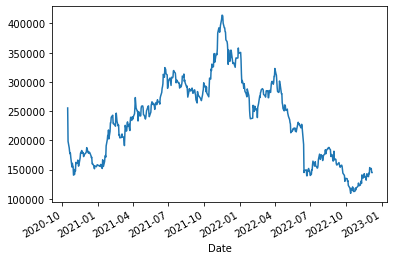

In [51]:
# stock_daily 변수에 할당된 수집된 데이터의 종가 그래프를 그립니다.
stock_daily["Close"].plot()

<AxesSubplot:xlabel='Date'>

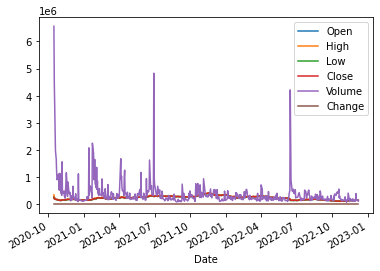

In [53]:
# 전체 데이터프레임을 plot() 으로 시각화 하면 수치 데이터 전체를 선그래프로 그립니다.
stock_daily.plot()

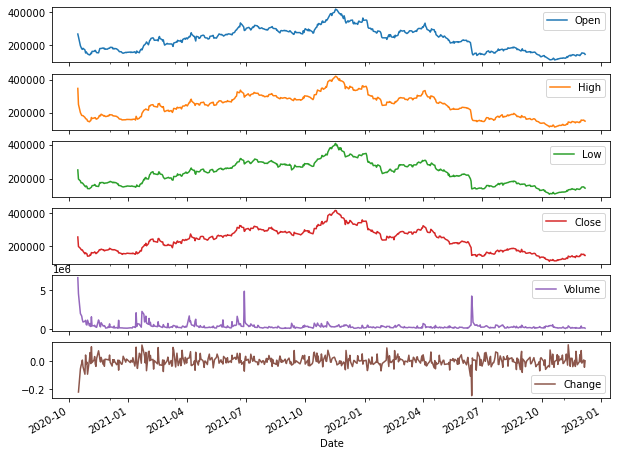

In [59]:
# 서브 플롯 그리기
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다.
g = stock_daily.plot(subplots = True, figsize = (10,8))

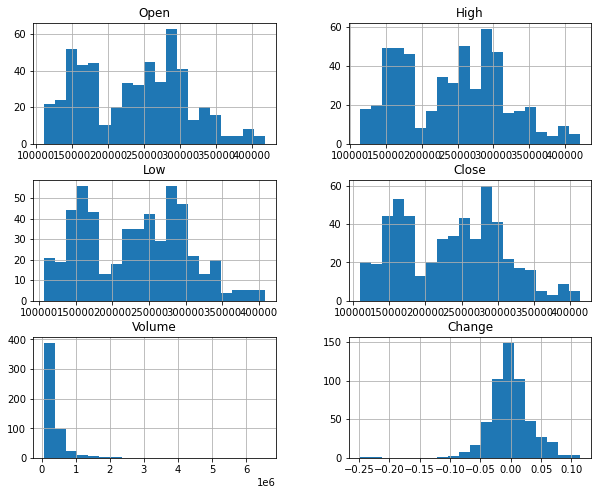

In [66]:
# 히스토그램 그리기
h = stock_daily.hist(figsize=(10,8), bins=20)

<AxesSubplot:xlabel='Date'>

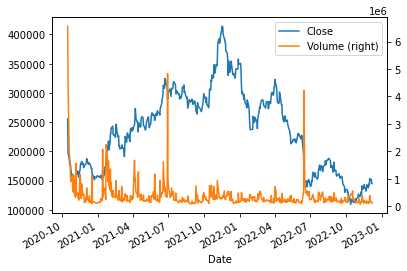

In [73]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume")

In [79]:
stock_daily.describe()

Open           High            Low          Close  \
count     532.000000     532.000000     532.000000     532.000000   
mean   235875.161654  241395.864662  230567.046992  235369.154135   
std     71005.565555   72152.038751   69668.935061   70838.585621   
min    111000.000000  113000.000000  107000.000000  109500.000000   
25%    168000.000000  173683.750000  164958.750000  169713.750000   
50%    243270.000000  248495.000000  237302.500000  241250.000000   
75%    288500.000000  294500.000000  283750.000000  288500.000000   
max    418000.000000  421500.000000  408500.000000  414000.000000   

             Volume      Change  
count  5.320000e+02  531.000000  
mean   3.863455e+05   -0.000410  
std    5.160643e+05    0.035782  
min    7.409200e+04   -0.248705  
25%    1.759082e+05   -0.020305  
50%    2.559305e+05    0.000000  
75%    4.094978e+05    0.016965  
max    6.557212e+06    0.114625

## 상장종목 목록 가져오기

In [4]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [8]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2020", "2021")["Close"]
    item_list.append(close)

In [9]:
item_list

[Date
 2020-01-02    55200
 2020-01-03    55500
 2020-01-06    55500
 2020-01-07    55800
 2020-01-08    56800
               ...  
 2020-12-23    73900
 2020-12-24    77800
 2020-12-28    78700
 2020-12-29    78300
 2020-12-30    81000
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02     94700
 2020-01-03     94500
 2020-01-06     94300
 2020-01-07     94000
 2020-01-08     97400
                ...  
 2020-12-23    116000
 2020-12-24    118000
 2020-12-28    115500
 2020-12-29    116000
 2020-12-30    118500
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02    118000
 2020-01-03    116000
 2020-01-06    116000
 2020-01-07    115500
 2020-01-08    112000
                ...  
 2020-12-23    185000
 2020-12-24    187000
 2020-12-28    189500
 2020-12-29    190500
 2020-12-30    192000
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02    167118
 2020-01-03    164796
 2020-01-06    160619
 2020-01-07    165261
 2020-01-08    160619
                ...  
 2020-

In [10]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

삼성전자  SK하이닉스     현대차    셀트리온    LG화학   POSCO    삼성물산   NAVER
Date                                                                     
2020-01-02  55200   94700  118000  167118  314000  236000  107500  182500
2020-01-03  55500   94500  116000  164796  311000  237000  107500  181500
2020-01-06  55500   94300  116000  160619  307000  231000  106000  180500
2020-01-07  55800   94000  115500  165261  311000  232000  108000  187000
2020-01-08  56800   97400  112000  160619  302000  228000  105000  183000
...           ...     ...     ...     ...     ...     ...     ...     ...
2020-12-23  73900  116000  185000  329592  806000  267500  137000  284000
2020-12-24  77800  118000  187000  322629  818000  271000  139000  282000
2020-12-28  78700  115500  189500  309631  814000  273500  140000  281000
2020-12-29  78300  116000  190500  340830  813000  270000  136500  283000
2020-12-30  81000  118500  192000  339413  824000  272000  138000  292500

[248 rows x 8 columns]

In [11]:
#시각화를 위한 폰트설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [12]:
get_font_family()

'Malgun Gothic'

In [13]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font",family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

<AxesSubplot:title={'center':'한글폰트'}>

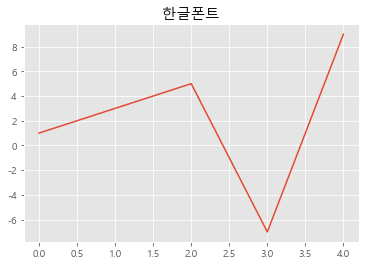

In [14]:
# 한글폰트 확인
pd.Series([1 ,3 ,5 ,-7 ,9]).plot(title="한글폰트")

<AxesSubplot:xlabel='Date'>

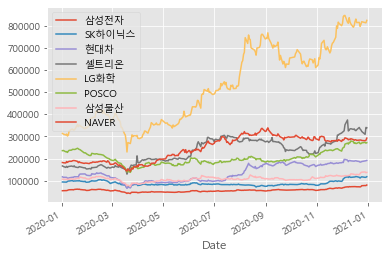

In [15]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot()

<AxesSubplot:xlabel='Date'>

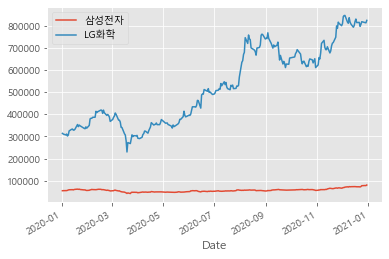

In [16]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[["삼성전자", "LG화학"]].plot()

<AxesSubplot:xlabel='Date'>

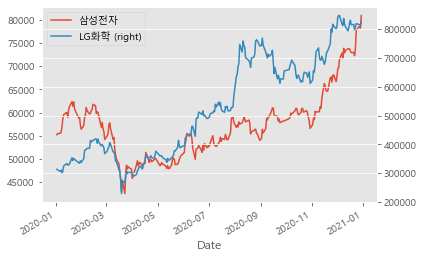

In [17]:
# secondary_y를 사용해 2축 그래프 그리기
df[["삼성전자", "LG화학"]].plot(secondary_y="LG화학")

In [18]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[['LG화학', '삼성전자']]
df_plot = df2 / df2.iloc[0] - 1
df_plot

LG화학      삼성전자
Date                          
2020-01-02  0.000000  0.000000
2020-01-03 -0.009554  0.005435
2020-01-06 -0.022293  0.005435
2020-01-07 -0.009554  0.010870
2020-01-08 -0.038217  0.028986
...              ...       ...
2020-12-23  1.566879  0.338768
2020-12-24  1.605096  0.409420
2020-12-28  1.592357  0.425725
2020-12-29  1.589172  0.418478
2020-12-30  1.624204  0.467391

[248 rows x 2 columns]

<AxesSubplot:xlabel='Date'>

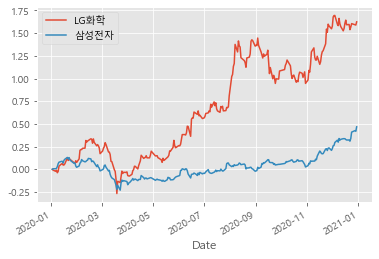

In [19]:
# 수익률 시각화 하기
df_plot.plot()

<AxesSubplot:title={'center':'수익률 그래프'}, xlabel='Date'>

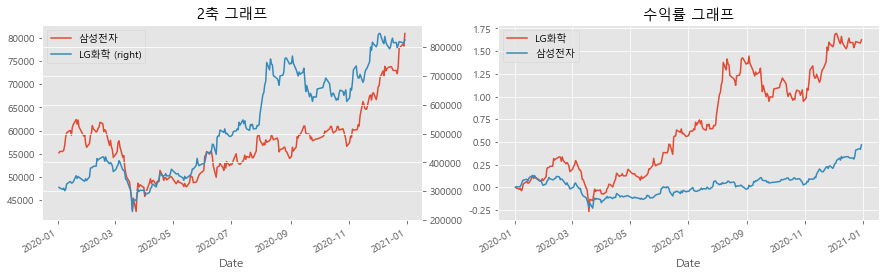

In [20]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.

fig, axes = plt.subplots(1, 2, figsize = (15,4))

df[["삼성전자", "LG화학"]].plot(secondary_y="LG화학", ax=axes[0], title= '2축 그래프')
df_plot.plot(ax = axes[1], title = '수익률 그래프')

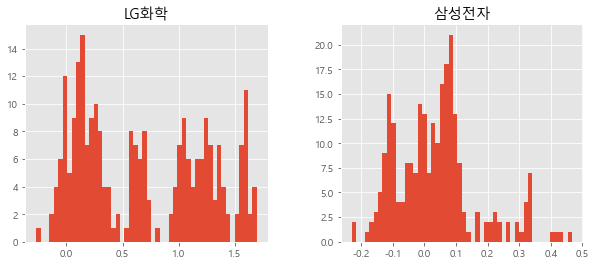

In [21]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
h = df_plot.hist(figsize = (10,4), bins=50)

In [28]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm  = df / df.iloc[0] - 1
df_norm 

삼성전자    SK하이닉스       현대차      셀트리온      LG화학     POSCO  \
Date                                                                     
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-03  0.005435 -0.002112 -0.016949 -0.013894 -0.009554  0.004237   
2020-01-06  0.005435 -0.004224 -0.016949 -0.038889 -0.022293 -0.021186   
2020-01-07  0.010870 -0.007392 -0.021186 -0.011112 -0.009554 -0.016949   
2020-01-08  0.028986  0.028511 -0.050847 -0.038889 -0.038217 -0.033898   
...              ...       ...       ...       ...       ...       ...   
2020-12-23  0.338768  0.224921  0.567797  0.972211  1.566879  0.133475   
2020-12-24  0.409420  0.246040  0.584746  0.930546  1.605096  0.148305   
2020-12-28  0.425725  0.219641  0.605932  0.852769  1.592357  0.158898   
2020-12-29  0.418478  0.224921  0.614407  1.039457  1.589172  0.144068   
2020-12-30  0.467391  0.251320  0.627119  1.030978  1.624204  0.152542   

                삼성물산     NAVER  
Date                            
2020-01-02  0.000000  0.000000  
2020-01-03  0.000000 -0.005479  
2020-01-06 -0.013953 -0.010959  
2020-01-07  0.004651  0.024658  
2020-01-08 -0.023256  0.002740  
...              ...       ...  
2020-12-23  0.274419  0.556164  
2020-12-24  0.293023  0.545205  
2020-12-28  0.302326  0.539726  
2020-12-29  0.269767  0.550685  
2020-12-30  0.283721  0.602740  

[248 rows x 8 columns]

### 전체 종목의 수익률 시각화

<AxesSubplot:xlabel='Date'>

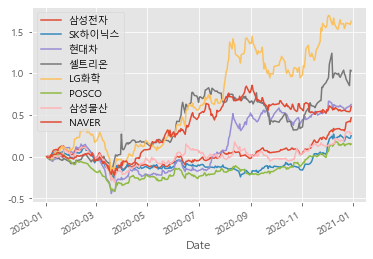

In [23]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot()

In [29]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

삼성전자      SK하이닉스         현대차        셀트리온        LG화학       POSCO  \
count  248.000000  248.000000  248.000000  248.000000  248.000000  248.000000   
mean     0.035385   -0.061919    0.138853    0.413473    0.678992   -0.138959   
std      0.127932    0.115102    0.314121    0.345338    0.559427    0.128907   
min     -0.230072   -0.271383   -0.441525   -0.222226   -0.267516   -0.415254   
25%     -0.052989   -0.134108   -0.155932    0.087500    0.149682   -0.225106   
50%      0.028986   -0.109293    0.052966    0.431934    0.617834   -0.169492   
75%      0.088768    0.005808    0.461864    0.692355    1.190287   -0.062500   
max      0.467391    0.272439    0.665254    1.241656    1.694268    0.184322   

             삼성물산       NAVER  
count  248.000000  248.000000  
mean     0.017393    0.348862  
std      0.103888    0.301454  
min     -0.306977   -0.216438  
25%     -0.032558    0.021918  
50%      0.013953    0.479452  
75%      0.080233    0.600000  
max      0.302326    0.857534

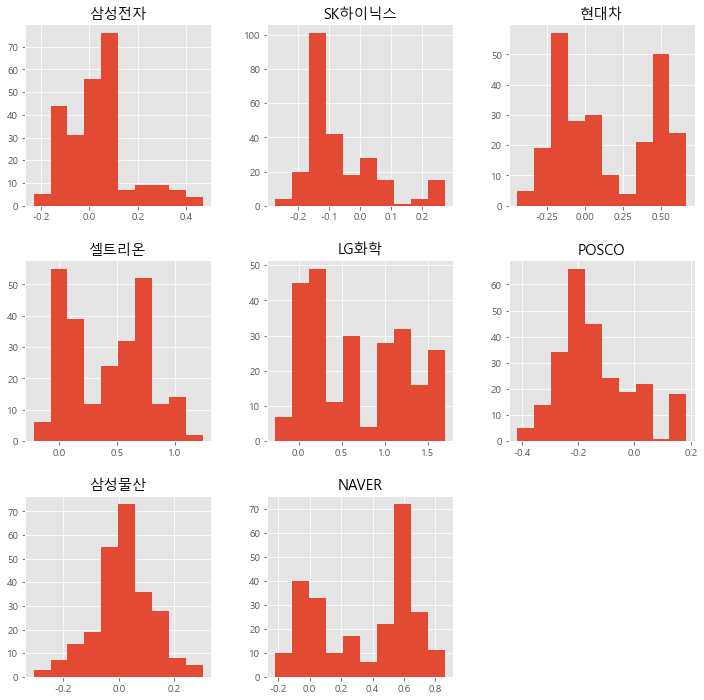

In [35]:
# 수익률에 대한 히스토그램 그리기
h = df_norm.hist(figsize = (12,12))

In [36]:
# skew 로 수익률의 왜도를 구합니다.
df_norm.skew()

삼성전자      0.860397
SK하이닉스    1.229166
현대차       0.174059
셀트리온      0.046505
LG화학      0.244831
POSCO     0.601748
삼성물산     -0.175907
NAVER    -0.271592
dtype: float64

In [37]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

삼성전자      0.940228
SK하이닉스    0.951988
현대차      -1.502115
셀트리온     -1.242034
LG화학     -1.375776
POSCO    -0.115173
삼성물산      0.680725
NAVER    -1.448779
dtype: float64

## 수집할 URL 정하기

In [2]:
# 종목번호와 상장사 이름을 item_code와 item_name으로 설정
# item_code = "352820"
# item_name = "빅히트"

item_code = "326030"
item_name = "SK바이오팜"
page_no = 1

# 종목 URL 만들기
url = f"https://finance.naver.com/item/sise_day.naver?code={item_code}&page={page_no}"
url

'https://finance.naver.com/item/sise_day.naver?code=326030&page=1'

In [3]:
# 데이터를 로드 했을 떄 한글 인코딩이 깨진다면 cp949 로 대부분 불러올 수 있음
import requests

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

response = requests.get(url,headers=headers)
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/world.css">\n</head>\n<body>\n<script

In [4]:
# BeautifulSoup 을 통한 table 태그 찾기
from bs4 import BeautifulSoup as bs

html = bs(response.text, "lxml")

table = html.select("table")

In [5]:
len(table)

2

In [6]:
table[1]

<table align="center" class="Nnavi" summary="페이지 네비게이션 리스트">
<caption>페이지 네비게이션</caption>
<tr>
<td class="on">
<a href="/item/sise_day.naver?code=326030&amp;page=1">1</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=2">2</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=3">3</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=4">4</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=5">5</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=6">6</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=7">7</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=8">8</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=9">9</a>
</td>
<td>
<a href="/item/sise_day.naver?code=326030&amp;page=10">10</a>
</td>
<td class="pgR">
<a href="/item/sise_day.naver?code=326030&amp;page=11">
				다음<img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarR.gif" width="3"/>
<

In [7]:
# Pandas 코드 한 줄로 데이터 수집하기
pd.read_html(str(table))[0]

날짜       종가     전일비       시가       고가       저가       거래량
0          NaN      NaN     NaN      NaN      NaN      NaN       NaN
1   2023.04.13  71900.0  1700.0  69700.0  72000.0  69600.0   37112.0
2   2023.04.12  70200.0  1000.0  68900.0  71600.0  68500.0  236709.0
3   2023.04.11  69200.0  5800.0  63400.0  69600.0  63000.0  368294.0
4   2023.04.10  63400.0   800.0  62300.0  63600.0  61500.0   92102.0
5   2023.04.07  62600.0   300.0  62900.0  63800.0  62300.0   81564.0
6          NaN      NaN     NaN      NaN      NaN      NaN       NaN
7          NaN      NaN     NaN      NaN      NaN      NaN       NaN
8          NaN      NaN     NaN      NaN      NaN      NaN       NaN
9   2023.04.06  62900.0   800.0  63800.0  65200.0  62800.0  120603.0
10  2023.04.05  63700.0   100.0  63700.0  65000.0  62900.0  119627.0
11  2023.04.04  63800.0  1700.0  62200.0  64200.0  61400.0  131232.0
12  2023.04.03  62100.0  1200.0  63300.0  64000.0  61900.0  104196.0
13  2023.03.31  63300.0  1200.0  62500.0  63600.0  61800.0  128563.0
14         NaN      NaN     NaN      NaN      NaN      NaN       NaN

In [8]:
# table[0]와 table[1]을 확인하여 보면 table[0]에 필요한 데이터들이 있습니다.
table[0]

<table cellspacing="0" class="type2">
<tr>
<th>날짜</th>
<th>종가</th>
<th>전일비</th>
<th>시가</th>
<th>고가</th>
<th>저가</th>
<th>거래량</th>
</tr>
<tr>
<td colspan="7" height="8"></td>
</tr>
<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td align="center"><span class="tah p10 gray03">2023.04.13</span></td>
<td class="num"><span class="tah p11">71,900</span></td>
<td class="num">
<img alt="상승" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_up.gif" style="margin-right:4px;" width="7"/><span class="tah p11 red02">
				1,700
				</span>
</td>
<td class="num"><span class="tah p11">69,700</span></td>
<td class="num"><span class="tah p11">72,000</span></td>
<td class="num"><span class="tah p11">69,600</span></td>
<td class="num"><span class="tah p11">37,112</span></td>
</tr>
<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td align="center"><span class="tah p10 gray03">2023.04.12</span></td>
<td class="num"><span class="tah p11">70,200</span></td>
<td 

In [9]:
# dropna를 통해 결측치가 들어있는 row를 제거합니다.
# 이 결측치는 네이버 금융상에서 줄을 나누기 위한 결측치였음.
temp = pd.read_html(str(table))[0]
temp.dropna()

날짜       종가     전일비       시가       고가       저가       거래량
1   2023.04.13  71900.0  1700.0  69700.0  72000.0  69600.0   37112.0
2   2023.04.12  70200.0  1000.0  68900.0  71600.0  68500.0  236709.0
3   2023.04.11  69200.0  5800.0  63400.0  69600.0  63000.0  368294.0
4   2023.04.10  63400.0   800.0  62300.0  63600.0  61500.0   92102.0
5   2023.04.07  62600.0   300.0  62900.0  63800.0  62300.0   81564.0
9   2023.04.06  62900.0   800.0  63800.0  65200.0  62800.0  120603.0
10  2023.04.05  63700.0   100.0  63700.0  65000.0  62900.0  119627.0
11  2023.04.04  63800.0  1700.0  62200.0  64200.0  61400.0  131232.0
12  2023.04.03  62100.0  1200.0  63300.0  64000.0  61900.0  104196.0
13  2023.03.31  63300.0  1200.0  62500.0  63600.0  61800.0  128563.0

In [10]:
# 페이지별 데이터 수집 함수 만들기
# 종목 번호를 이용해 page에 따라 데이터를 읽어오는 함수
# """ 는 이 두개 사이의 행들은 주석 처리되며, 함수의 docstring 으로 사용됩니다.


def get_day_list(item_code, page_no):
    """
    일자별 시세를 페이지별로 수집
    """ 
    url = f"https://finance.naver.com/item/sise_day.nhn?code={item_code}&page={page_no}"
    
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}

    response = requests.get(url, headers=headers)
    html = bs(response.text, "lxml")
    table = html.select("table")
    table = pd.read_html(str(table))
    temp = table[0].dropna()
    return temp

In [11]:
# 함수가 잘 만들어졌는지 확인하기
get_day_list(item_code, 4)

날짜       종가     전일비       시가       고가       저가       거래량
1   2023.03.02  65200.0  1500.0  66700.0  66700.0  65000.0  110107.0
2   2023.02.28  66700.0  2000.0  64700.0  66900.0  64700.0  138361.0
3   2023.02.27  64700.0   800.0  64600.0  65100.0  64200.0   61412.0
4   2023.02.24  65500.0  1000.0  66500.0  66600.0  65200.0   94351.0
5   2023.02.23  66500.0     0.0  66500.0  67300.0  66000.0   67306.0
9   2023.02.22  66500.0  1200.0  67000.0  67000.0  66200.0   65827.0
10  2023.02.21  67700.0   500.0  67800.0  68300.0  67200.0   62326.0
11  2023.02.20  68200.0  1900.0  66400.0  68300.0  65700.0   64324.0
12  2023.02.17  66300.0  1700.0  67000.0  67200.0  66200.0   75623.0
13  2023.02.16  68000.0  1800.0  66400.0  68800.0  66300.0   81939.0

In [63]:
#함수로 만들기
def get_item_list(item_code, item_name):
    """
    일별 시세를 수집하는 함수
    """
    page_no = 1
    # 데이터를 저장할 빈 변수 선언
    item_list = []

    while True:
        
        temp = get_day_list(item_code, page_no)
        item_list.append(temp)

        page_no += 1
        time.sleep(0.1)


       # 페이지 10개 불러오기
        if page_no > 10:
            break        
    df = pd.concat(item_list)
    df["종목코드"] = item_code
    df["종목명"] = item_name
    
    cols = ['종목코드', '종목명', '날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']
    df = df[cols]

    return df

In [66]:
item_code = "352820"
item_name = "하이브"
# 빅히트의 사명이 하이브로 변경되었습니다.

# item_code = "326030"
# item_name = "SK바이오팜"

get_item_list(item_code, item_name)

종목코드  종목명          날짜        종가      전일비        시가        고가        저가  \
1   352820  하이브  2023.04.13  239000.0   3500.0  238000.0  249500.0  231500.0   
2   352820  하이브  2023.04.12  235500.0  11000.0  223500.0  237000.0  222500.0   
3   352820  하이브  2023.04.11  224500.0   2500.0  222500.0  227000.0  216000.0   
4   352820  하이브  2023.04.10  222000.0   5000.0  218500.0  223000.0  215000.0   
5   352820  하이브  2023.04.07  217000.0  12000.0  206000.0  219000.0  200500.0   
..     ...  ...         ...       ...      ...       ...       ...       ...   
9   352820  하이브  2022.11.25  139000.0   4000.0  142000.0  144000.0  138500.0   
10  352820  하이브  2022.11.24  143000.0   2000.0  142000.0  144000.0  139000.0   
11  352820  하이브  2022.11.23  141000.0   9000.0  135000.0  143500.0  134500.0   
12  352820  하이브  2022.11.22  132000.0   5500.0  136500.0  138500.0  131500.0   
13  352820  하이브  2022.11.21  137500.0    500.0  139500.0  143000.0  135500.0   

         거래량  
1   288264.0  
2   321808.0  
3   223899.0  
4   265446.0  
5   493700.0  
..       ...  
9   138106.0  
10  134981.0  
11  201975.0  
12  109850.0  
13  169182.0  

[100 rows x 9 columns]

In [1]:
import plotly.express as px
# px 에서 내장하고 있는 data.stocks 데이터를 불러옵니다.
df = px.data.stocks()
df

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0    2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1    2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2    2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3    2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4    2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708
..          ...       ...       ...       ...       ...       ...       ...
100  2019-12-02  1.216280  1.546914  1.425061  1.075997  1.463641  1.720717
101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
102  2019-12-16  1.224418  1.596800  1.453455  1.104094  1.604362  1.784896
103  2019-12-23  1.226504  1.656000  1.521226  1.113728  1.567170  1.802472
104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185

[105 rows x 7 columns]

In [3]:
# 일별 수익률에서 -1을 빼줍니다.
df_1 = df.set_index("date") -1
df_1

GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-01-08  0.018172  0.011943  0.061881 -0.040032  0.053526  0.015988
2018-01-15  0.032008  0.019771  0.053240 -0.029757  0.049860  0.020524
2018-01-22  0.066783 -0.019943  0.140676  0.016858  0.307681  0.066561
2018-01-29  0.008773 -0.082857  0.163374  0.018357  0.273537  0.040708
...              ...       ...       ...       ...       ...       ...
2019-12-02  0.216280  0.546914  0.425061  0.075997  0.463641  0.720717
2019-12-09  0.222821  0.572286  0.432660  0.038855  0.421496  0.752239
2019-12-16  0.224418  0.596800  0.453455  0.104094  0.604362  0.784896
2019-12-23  0.226504  0.656000  0.521226  0.113728  0.567170  0.802472
2019-12-30  0.213014  0.678000  0.503360  0.098475  0.540883  0.788185

[105 rows x 6 columns]

In [4]:
# 수익률을 막대그래프로 그립니다.
px.bar(df_1, x=df_1.index, y="GOOG")

## facet_col을 사용한 서브플롯 그리기

In [5]:
# df_1.columns 의 name을 "company"로 지정하기
df_1.columns.name = "company"
df_1.columns

Index(['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object', name='company')

In [6]:
# px.area 로 수익률 분포를 그립니다.
# facet_col 을 통해 서브플롯을 그릴 수 있습니다.
px.area(df_1,facet_col = "company", facet_col_wrap=2 )

## 여러 종목을 하나의 그래프로 표현하기

In [45]:
# px.line 으로 전체 데이터의 수익률을 구합니다.
# hover_data={"date": "|%Y-%m-%d"} 로 시간을 표현할 수 있습니다.
fig = px.line(df, x="date", y=df.columns,
        hover_data={"date": "|%Y-%m-%d"}, title = "일별수익률" )
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Date', 'AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close', 'AAPL.Volume', 'AAPL.Adjusted', 'dn', 'mavg', 'up', 'direction'] but received: date

##  Range Slider와 함께 시계열 그래프 그리기
* [Time Series and Date Axes | Python | Plotly](https://plotly.com/python/time-series/)

In [8]:
fig = px.line(df, x="date", y="AAPL",
        hover_data={"date": "|%Y-%m-%d"}, title = "애플")
fig.update_xaxes(rangeslider_visible = True)

In [18]:
# plotly.graph_objects 를 go라는 별칭으로 불러옵니다.
import plotly.graph_objects as go

In [19]:
# go.Candlestick 을 그립니다.
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open = df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])
fig.show()

In [17]:
# OHLC Open High Low close
#go.Ohlc를 그립니다.
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Ohlc(x=df['Date'],
                open = df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])
fig.show()

In [16]:
# Rangeslider를 제외하고 Candlestick을 그립니다.
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open = df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## 직접 수집한 주가 데이터로 시각화 해보기

In [16]:
# 직접 숮비한 주가 데이터로 시각화 하기
#FinanceDataReader 로드하기
import FinanceDataReader as fdr

In [20]:
# 특정 주가 불러오기
# FinanceDataReader의 DataReader는 미국 주식의 경우 종목코드대신 티커(Ticker)를 사용합니다.
# 티커는 약자와 비슷합니다.(마이크로소프트:MSFT, 스타벅스:SBUX 등)
# amd
amd = fdr.DataReader("AMD", "2015","2021")
amd.shape


(1511, 6)

In [18]:
amd.head()

Open  High   Low  Close  Adj Close    Volume
Date                                                    
2015-01-02  2.67  2.67  2.67   2.67       2.67         0
2015-01-05  2.67  2.70  2.64   2.66       2.66   8878200
2015-01-06  2.65  2.66  2.55   2.63       2.63  13912500
2015-01-07  2.63  2.65  2.54   2.58       2.58  12377600
2015-01-08  2.59  2.65  2.56   2.61       2.61  11136600

In [19]:
amd.tail()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-12-24  91.800003  92.510002  91.309998  91.809998  91.809998  16705900
2020-12-28  92.930000  93.139999  90.820000  91.599998  91.599998  30627300
2020-12-29  91.660004  92.459999  89.430000  90.620003  90.620003  31748200
2020-12-30  90.779999  92.849998  90.190002  92.290001  92.290001  25845000
2020-12-31  92.099998  92.300003  90.870003  91.709999  91.709999  24930700

### 선그래프 그리기

In [15]:
# px.line
px.line(amd, y="Close", title="AMD 일별 종가")

In [21]:
# 전일비에 대한 선 그래프를 그립니다.
px.line(amd, y="Adj Close")

In [22]:
# 전일비에 대한 히스토그램을 그립니다.
# marginal="box" 옵션을 사용해 봅니다.
px.histogram(amd, x="High", marginal="violin")

###  Range Slider와 함께 Candlestick 그리기
* [Time Series and Date Axes | Python | Plotly](https://plotly.com/python/time-series/)

In [23]:
#  Range Slider와 함께 Candlestick 그리기
amd.head(1)

Open  High   Low  Close  Adj Close  Volume
Date                                                  
2015-01-02  2.67  2.67  2.67   2.67       2.67       0

In [23]:
fig = go.Figure(data=[go.Candlestick(x=amd.index                                     ,
                open = amd['Open'],
                high=amd['High'],
                low=amd['Low'],
                close=amd['Close'])])
fig.show()

### OHLC(Open-High-Low-Close)

In [24]:
fig = go.Figure(data=[go.Ohlc(x=amd.index                                     ,
                open = amd['Open'],
                high=amd['High'],
                low=amd['Low'],
                close=amd['Close'])])
fig.show()

### 여러 종목의 수익률 보기

In [27]:
FAANG = ["AMZN", "AAPL", "NFLX", "GOOGL"]
FAANG

['AMZN', 'AAPL', 'NFLX', 'GOOGL']

In [28]:
# faang_list 의 종가 가져오기
faang_list = [fdr.DataReader(code, "2019","2021")["Close"] for code in FAANG]

In [29]:
# concat 으로 데이터 병합하기
df_faang = pd.concat(faang_list, axis=1)
df_faang.columns = FAANG

In [30]:
df_faang.shape

(505, 4)

In [31]:
# 수집한 데이터 확인하기
df_faang.head()

AMZN       AAPL        NFLX      GOOGL
Date                                                   
2019-01-02  76.956497  39.480000  267.660004  52.734001
2019-01-03  75.014000  35.547501  271.200012  51.273499
2019-01-04  78.769501  37.064999  297.570007  53.903500
2019-01-07  81.475502  36.982498  315.339996  53.796001
2019-01-08  82.829002  37.687500  320.269989  54.268501

In [32]:
df_faang.tail()

AMZN        AAPL        NFLX      GOOGL
Date                                                     
2020-12-24  158.634506  131.970001  513.969971  86.708000
2020-12-28  164.197998  136.690002  519.119995  88.697998
2020-12-29  166.100006  134.869995  530.869995  87.888000
2020-12-30  164.292496  133.720001  524.590027  86.812500
2020-12-31  162.846497  132.690002  540.729980  87.632004

In [33]:
# 일별 수익률 구하기

df_ratio = df_faang / df_faang.iloc[0] - 1
df_ratio

AMZN      AAPL      NFLX     GOOGL
Date                                              
2019-01-02  0.000000  0.000000  0.000000  0.000000
2019-01-03 -0.025241 -0.099607  0.013226 -0.027696
2019-01-04  0.023559 -0.061170  0.111746  0.022177
2019-01-07  0.058722 -0.063260  0.178136  0.020139
2019-01-08  0.076309 -0.045403  0.196555  0.029099
...              ...       ...       ...       ...
2020-12-24  1.061353  2.342705  0.920234  0.644252
2020-12-28  1.133647  2.462259  0.939475  0.681989
2020-12-29  1.158362  2.416160  0.983374  0.666629
2020-12-30  1.134875  2.387031  0.959912  0.646234
2020-12-31  1.116085  2.360942  1.020212  0.661774

[505 rows x 4 columns]

In [34]:
# 서브플롯을 그리기 위해 columns.name 을 설정하기
df_ratio.columns.name = "company"
df_ratio.columns

Index(['AMZN', 'AAPL', 'NFLX', 'GOOGL'], dtype='object', name='company')

### 선그래프 그리기

In [35]:
# px.line 으로 선 그래프 그리기
px.line(df_ratio, title="FAANG 일별 수익률")

### areaplot 그리기

In [36]:
# px.area 로 수익률 그래프 그리기
px.area(df_ratio)

In [37]:
px.area(df_ratio, facet_col = "company", facet_col_wrap=2)

### 막대그래프 그리기

In [38]:
px.bar(df_ratio, facet_col="company", facet_col_wrap=2)

In [39]:
px.bar(df_ratio, x=df_ratio.index, y="GOOGL")

### scatterplot 그리기

In [40]:
px.scatter(df_ratio, x="GOOGL", y="AAPL", marginal_x="box",marginal_y="violin")

### distribution 그리기

In [41]:
px.box(df_ratio, points="all")


In [42]:
px.violin(df_ratio, points="all")

In [43]:
px.histogram(df_ratio,facet_col="company", facet_col_wrap=2)
